In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import re
import random
from sklearn import preprocessing
import gc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
print('start reading...')
prefix = "/Users/isabelniu/Documents/HKUST-20Spring/ML/Project/CompleteDataSet/"
train = pd.read_csv(prefix + "FinalEncodedTrain.csv")
test = pd.read_csv(prefix + "FinalEncodedTest.csv")
print('done reading')

start reading...
done reading


In [5]:
train=train.drop(train.columns[0],1)
test=test.drop(test.columns[0],1)

In [6]:
print('data split start...')
# Features and target varaibles
X = train.drop(columns='target',axis=1)
Y = train['target']

data split start...


In [8]:
# Train and test split
X_train_all, X_test, y_train_all, y_test = train_test_split(X, Y, test_size=0.2)

# Further split train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_train_all, test_size=0.2)
print('data split done.')

data split done.


In [9]:
del X
del Y
del X_train_all
del y_train_all
import gc
gc.collect()

226

In [10]:
#Model Fitting
# Stage 1: Small Sample first
# Sampled train data 
random.seed(130)
idx = random.sample(range(0,X_train.shape[0]), 100000)
X_train_sampled = X_train.iloc[idx]
y_train_sampled = y_train.iloc[idx]

In [11]:
rf = RandomForestClassifier(n_estimators=100, oob_score=False, 
                            random_state=1,n_jobs=-1)
rf.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [12]:
predicted = rf.predict(X_val)
accuracy = accuracy_score(y_val, predicted)
print(f'Mean accuracy score on validation: {accuracy:.3}')

Mean accuracy score on validation: 0.647


In [13]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score on test: {accuracy:.3}')

Mean accuracy score on test: 0.648


In [14]:
#determine the importance of features
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 
                         'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rf, X_train_sampled ); fi[:10]

,cols,imp
9,count_song_played,0.074915
21,msno,0.066817
20,membership_days,0.063459
27,song_id,0.054973
29,song_length,0.054386
23,registration_date,0.052417
8,count_artist_played,0.051890
10,expiration_date,0.050074
3,artist_name,0.046860
33,source_type,0.041034


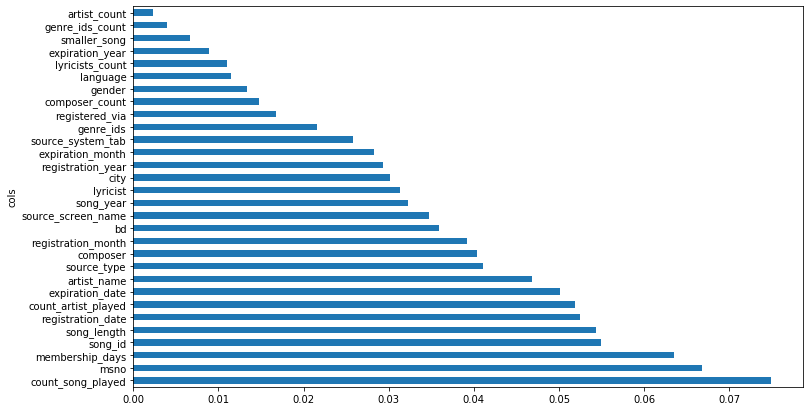

In [15]:
def plot_fi(fi):return fi.plot('cols', 'imp', 'barh', 
                               figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [16]:
to_keep = fi[fi.imp>0.015].cols; len(to_keep)

22

In [17]:
X_train_sampled = X_train_sampled[to_keep]
X_val = X_val[to_keep]
X_test = X_test[to_keep]
X_train = X_train[to_keep]

In [18]:
# Pipeline and grid search
pipe_dt = Pipeline([('clf', RandomForestClassifier(n_jobs=-1))]) 

grid_params = dict(clf__n_estimators = [50,100,150,200],
                  clf__max_features = ['sqrt', 'log2'],
                  clf__min_samples_split = [2,10,20])

gs = GridSearchCV(estimator=pipe_dt,  
                  param_grid=grid_params,
                  scoring='accuracy',
                  cv=5)

gs.fit(X_train_sampled, y_train_sampled)
f"{gs.score(X_test, y_test):.4f}"

'0.6512'

In [19]:
# Best algorithm with best hyperparameters 
# need to fit it to find specific model parameters
print(gs.best_estimator_)

# Best model with specific model parameters
gs.best_estimator_.get_params()['clf']

Pipeline(memory=None,
         steps=[('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=20,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [20]:
gs.best_estimator_.get_params()['clf']


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [23]:
m = RandomForestClassifier(n_estimators=150, n_jobs=-1,oob_score=False,
                           max_features='sqrt', min_samples_split= 20)
m.fit(X_train, y_train)

Mean accuracy score validation: 0.722


In [ ]:
#validation accuracy
predicted = m.predict(X_val)
accuracy = accuracy_score(y_val, predicted)
print(f'Mean accuracy score validation: {accuracy:.3}')

In [24]:
# Test accuracy
predicted = m.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score test: {accuracy:.3}')

Mean accuracy score test: 0.722


In [25]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.73341954 0.71233738]
recall: [0.6921208  0.75189639]
fscore: [0.71217194 0.7315825 ]
support: [732625 742859]


Confusion matrix, without normalization
[[507065 225560]
 [184306 558553]]
Normalized confusion matrix
[[0.69 0.31]
 [0.25 0.75]]


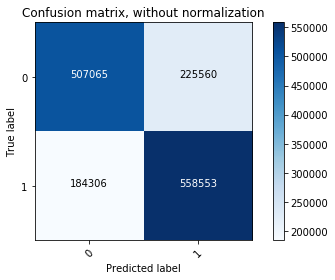

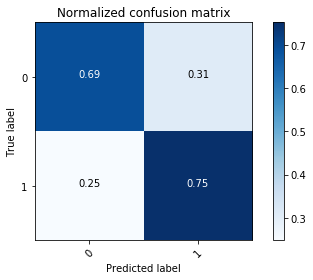

In [26]:
import itertools
from sklearn.metrics import confusion_matrix
class_names = ['0','1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),
                                  range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
#pd.DataFrame(predicted, columns=['rf']).to_csv('rf_test_score.csv',index=False)

In [28]:
# Predict probability for ROC curve
predicted = m.predict_proba(X_test)

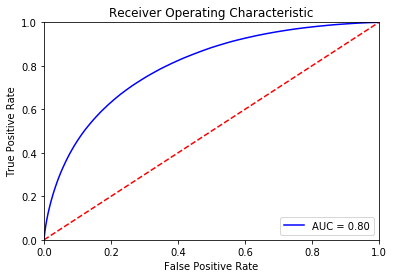

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, [i[1] for i in predicted])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 
         'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Fit with the whole training set

In [34]:
test.shape

(2556790, 22)

In [31]:
test=test[to_keep]

In [45]:
train = pd.read_csv(prefix + "FinalEncodedTrain.csv")

In [49]:
Y=train.target

In [50]:
train=train[to_keep]

In [51]:
print(train.shape,Y.shape)

(7377418, 22) (7377418,)


In [52]:
FinalRF = RandomForestClassifier(n_estimators=150, n_jobs=-1,oob_score=False,
                           max_features='sqrt', min_samples_split= 20)
FinalRF.fit(train, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
predicted = FinalRF.predict(test)

In [54]:
submission=pd.read_csv(prefix+'CompleteDataSet/sample_submission.csv')
submission.target=predicted
submission.to_csv('RF.csv',index=False)

,count_song_played,msno,membership_days,song_id,song_length,registration_date,count_artist_played,expiration_date,artist_name,source_type,...,bd,source_screen_name,song_year,lyricist,city,registration_year,expiration_month,source_system_tab,genre_ids,registered_via
0,694,17724,577,228222,224130,19,13654,18,42813,4,...,0,8,2014.0,26030,1,2016,9,4,364,7
1,6090,17724,577,407039,320470,19,115325,18,42633,4,...,0,8,2010.0,29125,1,2016,9,4,371,7
2,5,977,7,70211,315899,17,989,24,38492,10,...,0,11,2010.0,25428,1,2016,11,1,200,4
3,31,1878,3567,419092,285210,25,698,30,36423,8,...,30,17,2002.0,26030,3,2007,4,6,371,9
4,5,1878,3567,160096,197590,25,180,30,38298,8,...,30,17,2011.0,26030,3,2007,4,6,519,9
5,81,1878,3567,167673,216372,25,3733,30,19587,8,...,30,17,2013.0,26030,3,2007,4,6,371,9
6,90,1878,3567,101220,200306,25,4425,30,4754,8,...,30,17,2012.0,2905,3,2007,4,6,371,9
7,1053,1878,3567,140039,344305,25,4204,30,40805,5,...,30,8,2000.0,36113,3,2007,4,4,364,9
8,848,1878,3567,46416,289332,25,1485,30,40937,8,...,30,17,2012.0,28662,3,2007,4,6,371,9
9,2381,2927,639,130708,232176,19,61927,18,3344,4,...,0,8,2012.0,26030,1,2015,9,4,371,7


In [55]:
predicted=m.predict(test)

In [56]:
submission.target=predicted
submission.to_csv('Result/RF_smallSet.csv',index=False)